In [21]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torch.optim as optim
import tools
from math import sqrt
from script.tools import tools
#from script.collection import Parameter as pmt
import sys
print(sys.executable)
import net
import os
from script.tools import collection
#result = collection.collection("collection/workspace1")  #[iops,dic_ssd,dic_worload,f.path]
#result = collection.collection("collection/workspace2",result)
result = collection.collection("collection/workspace_ssd0_workload0")
#result = result[:1500]
plst = collection.getParameters(path="collection/config.xlsx",id = "0")
expect = ['Seed','key','default']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/opt/homebrew/anaconda3/bin/python
no scenario collection/workspace_ssd0_workload0/1854/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/425/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/866/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/1994/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/1702/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/428/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/3472/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/1796/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/2148/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/2918/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/3981/workload_scenario_1.xml
no scenario collection/workspace_

/opt/homebrew/anaconda3/lib/python3.9/site-packages/openpyxl/reader/excel.py:237: UserWarning: Data Validation extension is not supported and will be removed
  ws_parser.bind_all()


In [20]:
print(print(len(plst)))

91
None


In [24]:
from script.tools import collection
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
data_x,  data_y, keys =collection.result2lst(result,plst,expect)
data_x = np.array(data_x)
data_y = np.array(data_y).ravel()/1000
#print(data_x[0],"\n",data_y[0])
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
#print(type(X_train[0]),X_train[0],y_train[0])
# 初始化归一化器
scaler = MinMaxScaler()

# 仅对训练数据拟合归一化器
scaler.fit(X_train)

# 对训练集和测试集进行归一化
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化模型
# 初始化模型
models = {
    "Lasso": Lasso(alpha=0.003),
    "线性回归": LinearRegression(),
    "决策树": DecisionTreeRegressor(),
    "随机森林": RandomForestRegressor(),
    "knn": KNeighborsRegressor(),
    "支持向量机": SVR()

}
def test(y_,y_pre):
    y_e = abs(y_pre - y_)/y_
    print(torch.sum(y_e)/len(y_))
    return torch.sum(y_e)/len(y_)

In [23]:
from sklearn.metrics import mean_squared_error
# 假设 X_train, X_test, y_train, y_test 已经准备好了

# 创建Lasso回归模型实例
# alpha是正则化强度的参数，可以调整
lasso = Lasso(alpha=0.3)

# 训练模型
lasso.fit(X_train, y_train)

# 预测测试集
y_pred = lasso.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 显示重要的特征
print("Lasso Coefficients:", lasso.coef_)

# 确定重要特征（非零系数）
important_features = np.where(lasso.coef_ != 0)[0]
print("Important features:", important_features)
print(keys)

Mean Squared Error: 11.767324165898
Lasso Coefficients: [ 0.00000000e+00  4.08962015e-02  2.66759206e-05  2.29793185e-02
 -2.27520902e-06 -2.32949764e-06 -3.70820854e-07 -3.17322803e-07
  0.00000000e+00  4.38420129e-03 -4.11863196e-05 -1.21017111e-04
  8.63636649e-01  8.96719309e-01  0.00000000e+00  9.08346540e-02
 -2.27592893e-04 -0.00000000e+00  2.40880244e-02]
Important features: [ 1  2  3  4  5  6  7  9 10 11 12 13 15 16 18]
['Overprovisioning_Ratio', 'Flash_Channel_Count', 'Channel_Transfer_Rate', 'Chip_No_Per_Channel', 'Page_Read_Latency_LSB', 'Page_Read_Latency_MSB', 'Page_Program_Latency_LSB', 'Page_Program_Latency_MSB', 'Die_No_Per_Chip', 'Plane_No_Per_Die', 'Block_No_Per_Plane', 'Page_No_Per_Block', 'Channel_IDs', 'Chip_IDs', 'Die_IDs', 'Plane_IDs', 'Initial_Occupancy_Percentage', 'Working_Set_Percentage', 'Read_Percentage']


In [25]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    if len(y_true) == 0:  # 避免除零错误
        return np.inf
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
# 训练模型并进行预测
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mape=mean_absolute_percentage_error(y_test, predictions)
    print(f"test: {name} mape: {mape}")

    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_train_scaled)
    mape=mean_absolute_percentage_error(y_train, predictions)
    #print(f"train : {name} mape: {mape}")

test: Lasso mape: 66.40164710853738
test: 线性回归 mape: 67.87332557091355
test: 决策树 mape: 38.68152305608385
test: 随机森林 mape: 24.657444539198593
test: knn mape: 63.722487343016944
test: 支持向量机 mape: 22.59600449928004


In [204]:
# 调整随机森林参数
for i in range(0,15):
    m=RandomForestRegressor(n_estimators=10+i*10)
    m.fit(X_train_scaled, y_train)
    predictions = m.predict(X_test_scaled)
    mape=mean_absolute_percentage_error(y_test, predictions)
    print(f"test: {name} mape: {mape}")

test: net.8.bias mape: 27.10943660817383
test: net.8.bias mape: 25.09997493129685
test: net.8.bias mape: 24.96102482033827
test: net.8.bias mape: 24.448479679756247
test: net.8.bias mape: 24.44727676078933
test: net.8.bias mape: 25.2058572145888
test: net.8.bias mape: 24.532438098602302
test: net.8.bias mape: 24.782544580352276
test: net.8.bias mape: 24.32333650204268
test: net.8.bias mape: 24.21285621442332
test: net.8.bias mape: 24.319148885436647
test: net.8.bias mape: 23.99319554330231
test: net.8.bias mape: 24.27226481364829
test: net.8.bias mape: 24.63144663334772
test: net.8.bias mape: 24.051894385589353


In [231]:
print(X_train_scaled.shape,y_train.shape)

(2671, 19) (2671,)


In [193]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# 假设 X_train_scaled, X_test_scaled, y_train, y_test 已经准备好
# 将数据转换为PyTorch张量
X_train_tensor = torch.tensor(X_train_scaled).float()
y_train_tensor = torch.tensor(y_train).float().unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled).float()
y_test_tensor = torch.tensor(y_test).float().unsqueeze(1)



dataset = collection.CustomDataset(X_train_tensor, y_train_tensor)
batch_size = 5
dataloader = collection.DataLoader(dataset, batch_size=batch_size, shuffle=True)
model = net.DeepNet(19,8,1,5)
criterion = nn.MSELoss()



In [173]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)

torch.Size([1050, 19])
torch.Size([1050, 1])


In [194]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 200
lambda_l2 = 2e-5
loss_history = []
for epoch in range(num_epochs):
    total_loss = 0.0
    i = 0
    for batch_x, batch_y in dataloader: # x_train_tensor_nor
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        l2_regularization = torch.tensor(0.)
        for param in model.parameters():
            l2_regularization += torch.norm(param, p=2)
            loss = loss + l2_regularization * lambda_l2
        i = i + 1
        if i == -1:
            print("i=------"+str(i),"\n outputs: ",outputs,"\n y:",batch_y)
        total_loss += loss.item()
        loss_history.append(total_loss)
        if False:
            print("   \n \n")
            print(" outputs: ", outputs)
            print(" batch_y", batch_y)
            print(" loss ", loss)
            print("   \n \n")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0 or 1:
        average_loss = total_loss / len(dataloader)
        #print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.6f}')

Epoch [1/200], Loss: 15.615525
Epoch [2/200], Loss: 12.623671
Epoch [3/200], Loss: 12.543125
Epoch [4/200], Loss: 12.373263
Epoch [5/200], Loss: 10.328237
Epoch [6/200], Loss: 7.531717
Epoch [7/200], Loss: 6.245970
Epoch [8/200], Loss: 5.596116
Epoch [9/200], Loss: 5.124201
Epoch [10/200], Loss: 4.822739
Epoch [11/200], Loss: 4.580191
Epoch [12/200], Loss: 4.388997
Epoch [13/200], Loss: 4.225900
Epoch [14/200], Loss: 4.085370
Epoch [15/200], Loss: 3.957204
Epoch [16/200], Loss: 3.849389
Epoch [17/200], Loss: 3.760666
Epoch [18/200], Loss: 3.673024
Epoch [19/200], Loss: 3.580087
Epoch [20/200], Loss: 3.522461
Epoch [21/200], Loss: 3.462596
Epoch [22/200], Loss: 3.400319
Epoch [23/200], Loss: 4.775917
Epoch [24/200], Loss: 3.282657
Epoch [25/200], Loss: 3.253033
Epoch [26/200], Loss: 3.181106
Epoch [27/200], Loss: 3.173056
Epoch [28/200], Loss: 3.274967
Epoch [29/200], Loss: 3.073101
Epoch [30/200], Loss: 3.032769
Epoch [31/200], Loss: 2.998119
Epoch [32/200], Loss: 2.979064
Epoch [33/20

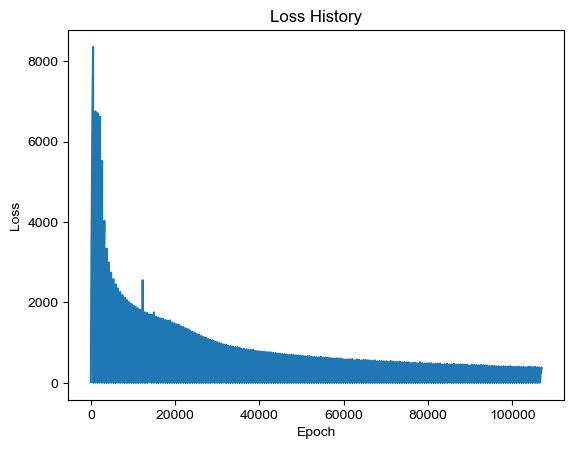

train: 实际 tensor([0.6203])
预测 tensor([0.6205], grad_fn=<AddBackward0>)
test: 实际 tensor([2.3023])
预测 tensor([2.4183], grad_fn=<AddBackward0>)
test R² Score: 0.6373359698621938
tensor(0.1582)
train R² Score: 0.9488866984518424
tensor(0.1522)


In [195]:
import matplotlib.pyplot as plt

# 假设 loss_history 是包含损失值的列表
# loss_history = [...]

# 绘制损失曲线
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
id=0
#print(X_train_tensor[id])
print("train: 实际",y_train_tensor[id])
print("预测",model(X_train_tensor[id]))

print("test: 实际",y_test_tensor[id])
print("预测",model(X_test_tensor[id]))

model.eval()  # 设置为评估模式
with torch.no_grad():
    predictions_test = model(X_test_tensor)  # 移除单维度条目
    r2 = r2_score(y_test_tensor.numpy(), predictions_test.numpy())
    print(f"test R² Score: {r2}")
    test(y_test_tensor,predictions_test)

    predictions_train = model(X_train_tensor)  # 移除单维度条目
    r2 = r2_score(y_train_tensor.numpy(), predictions_train.numpy())
    print(f"train R² Score: {r2}")
    test(y_train_tensor,predictions_train)


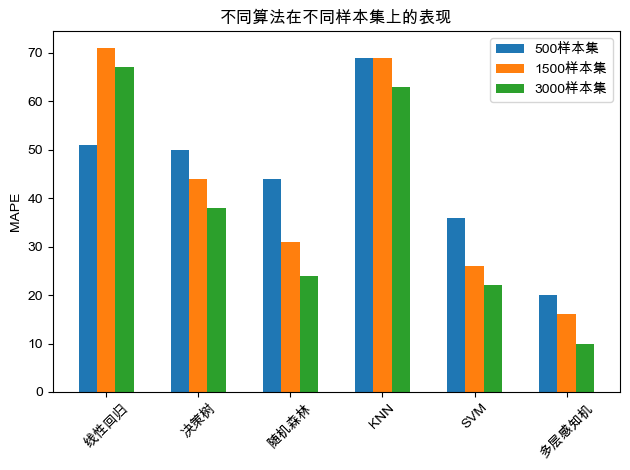

In [217]:
import matplotlib.pyplot as plt
import numpy as np
# 设置matplotlib的字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
# 数据
algorithms = ['线性回归', '决策树', '随机森林', 'KNN', 'SVM', '多层感知机']
data_500 = [51, 50, 44, 69, 36, 20]
data_1500 = [71, 44, 31, 69, 26, 16]
data_3000 = [67, 38, 24, 63, 22, 10]

# X轴的位置
x = np.arange(len(algorithms))

# 绘制图形
width = 0.2  # 柱状图的宽度
plt.bar(x - width, data_500, width, label='500样本集')
plt.bar(x, data_1500, width, label='1500样本集')
plt.bar(x + width, data_3000, width, label='3000样本集')

# 添加标签和标题
#plt.xlabel('算法')
plt.ylabel('MAPE')
plt.title('不同算法在不同样本集上的表现')
plt.xticks(x, algorithms, rotation=45)  # 设置X轴刻度标签
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()

In [339]:

def train(dataloader,criterion,optimizer,model,num_epochs,loss_history):
    for epoch in range(num_epochs):
        i = 0
        for batch_x, batch_y in dataloader:
            i = i +1
            #if batch_x.shape!=torch.Size([5,19]):
                #print("shape error i:",i,"\n x:",batch_x,"\n y:",batch_y)
                #break
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_history.append(loss.item())
        if epoch%20==0:
            print("loss",loss)
def plt_loss(loss_history):
    plt.figure(figsize=(10, 6))  # 可以调整图形的大小

    # 绘制曲线图
    plt.plot(loss_history, marker='o')  # marker='o' 表示数据点

    # 添加标题和标签
    plt.title("Line Graph of Data")
    plt.xlabel("Index")
    plt.ylabel("Value")

    # 显示图形
    plt.show()

In [340]:
#自编码模型
from net import Autoencoder
#数据集
dataset_autoauto = collection.CustomDataset(X_train_tensor, X_train_tensor)
batch_size = 5
dataloader = collection.DataLoader(dataset_autoauto, batch_size=batch_size, shuffle=True)

autoencoder = Autoencoder()
criterion_autoencoder = nn.MSELoss()
optimizer_autoencoder = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
loss_history=[]

In [350]:
train(dataloader,criterion_autoencoder,optimizer_autoencoder,autoencoder,100,loss_history)
#print(dataloader)

loss tensor(0.0231, grad_fn=<MseLossBackward0>)
loss tensor(0.0478, grad_fn=<MseLossBackward0>)
loss tensor(0.0693, grad_fn=<MseLossBackward0>)
loss tensor(0.0314, grad_fn=<MseLossBackward0>)
loss tensor(0.0503, grad_fn=<MseLossBackward0>)


In [348]:
#print(loss_history)
#print(optimizer_autoencoder.state)

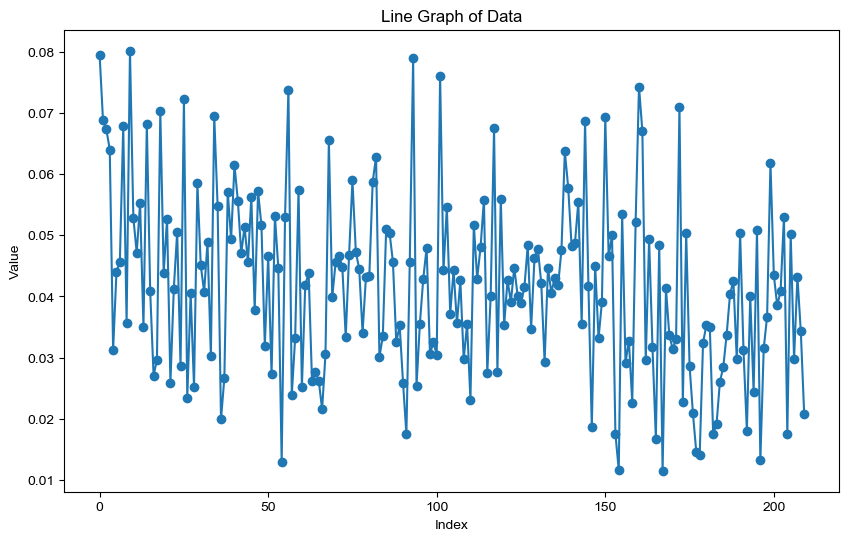

tensor([0.6485, 0.8571, 0.0843, 0.4286, 0.7680, 0.5250, 0.7646, 0.7079, 0.7143,
        0.8571, 0.3333, 0.4000, 0.0000, 0.2857, 0.4286, 0.7143, 0.3500, 0.1800,
        0.4600])
tensor([0.4291, 0.6520, 0.5322, 0.5645, 0.5679, 0.4891, 0.5526, 0.6203, 0.7424,
        0.9379, 0.2341, 0.2565, 0.2713, 0.2070, 0.3575, 0.6435, 0.5103, 0.3941,
        0.3213], grad_fn=<SigmoidBackward0>)


In [354]:
plt_loss(loss_history)
id = 1
print(X_train_tensor[id])
print(autoencoder(X_train_tensor[id]))

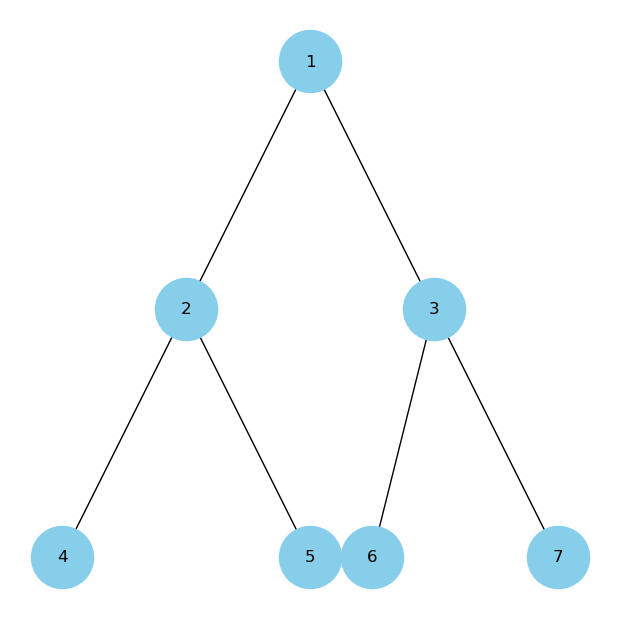

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个简单的二叉树结构
binary_tree = nx.DiGraph()
binary_tree.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])

# 绘制二叉树
plt.figure(figsize=(6, 6))
pos = {1: (0, 0), 2: (-1, -1), 3: (1, -1), 4: (-2, -2), 5: (0, -2), 6: (0.5, -2), 7: (2, -2)}  # 设置节点位置
nx.draw(binary_tree, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, arrows=False)
plt.show()


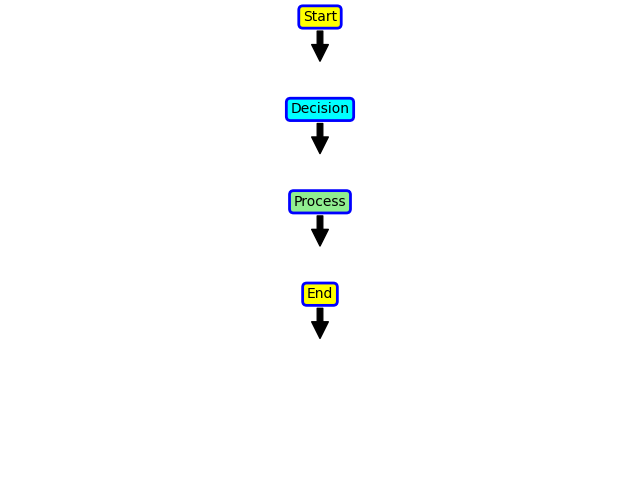

In [27]:
import matplotlib.pyplot as plt

# 定义流程图的元素
decision_box = dict(boxstyle="round,pad=0.3", fc="cyan", ec="b", lw=2)
start_end_box = dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=2)
process_box = dict(boxstyle="round,pad=0.3", fc="lightgreen", ec="b", lw=2)

# 创建流程图
def create_flowchart():
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.annotate('Start', xy=(0.5, 0.9), xytext=(0.5, 1),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center', va='center',
                bbox=start_end_box)

    ax.annotate('Decision', xy=(0.5, 0.7), xytext=(0.5, 0.8),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center', va='center',
                bbox=decision_box)

    ax.annotate('Process', xy=(0.5, 0.5), xytext=(0.5, 0.6),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center', va='center',
                bbox=process_box)

    ax.annotate('End', xy=(0.5, 0.3), xytext=(0.5, 0.4),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center', va='center',
                bbox=start_end_box)

    ax.axis('off')
    plt.show()

# 绘制流程图
create_flowchart()

In [30]:
import torch
from torch import nn

class SAB(nn.Module):
    """Set Attention Block (SAB)"""
    def __init__(self, dim_in, dim_out, num_heads):
        super(SAB, self).__init__()
        self.self_attention = nn.MultiheadAttention(dim_in, num_heads)
        self.layer_norm = nn.LayerNorm(dim_out)
        self.fc = nn.Linear(dim_in, dim_out)

    def forward(self, x):
        # Attention
        x_attended, _ = self.self_attention(x, x, x)
        x = x + x_attended
        x = self.layer_norm(x)

        # Feedforward
        x = x + self.fc(x)

        return x

class SetTransformer(nn.Module):
    """The Set Transformer model"""
    def __init__(self, dim_input, dim_output, num_heads, num_inds, dim_hidden):
        super(SetTransformer, self).__init__()
        self.encoder = nn.Sequential(
            SAB(dim_input, dim_hidden, num_heads),
            SAB(dim_hidden, dim_hidden, num_heads),
        )
        self.decoder = nn.Sequential(
            nn.Linear(dim_hidden, dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden, dim_output),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.mean(dim=1)  # Pooling
        y = self.decoder(x)
        return y

# Settings for the model
dim_input = 10  # Replace with your input dimension
dim_output = 1  # Replace with your output dimension
num_heads = 4
num_inds = 16  # Number of inducing points
dim_hidden = 128  # Dimension of hidden layers

# Example usage
set_transformer = SetTransformer(dim_input, dim_output, num_heads, num_inds, dim_hidden)

# Example set of vectors (batch_size, set_size, dim_input)
input_set = torch.randn(32, 10, dim_input)

# Forward pass
output = set_transformer(input_set)

print(output)  # The output y


AssertionError: embed_dim must be divisible by num_heads